# Introduction to Pandas for Feature Engineering
Welcome! If you are looking for a short and sweet, but effective, introduction to some of the coding steps required to perform feature engineering and data analysis for machine learning, look no further. 

This notebook will use a genomics data set, analyze it, and prepare it for machine learning modeling. 

I'm assuming you are familiar with writing and reading code, and that you've touched some Python syntax. I'll help ramp you up, very quickly.

### Get libraries
First, we'll want to reference the open source libraries that make all of this possible. I'm using Pandas as my backbone here, but we'll build ontop of that as we need more and more libraries.

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from multiprocessing import Pool


%matplotlib inline

### Get some data
Ok! We're going to pull some genomics data, in particular with respect to its relationshp to human health. This is a public dataset coming from ClinVar.
- https://www.ncbi.nlm.nih.gov/clinvar/ 

In [4]:
# !wget ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar.vcf.gz

### Load into a Pandas DataFrame

If you're thinking, now what on Earth is a .vcf file, that makes two of us! Fortunately the kind developers who announced this dataset also have a script that converts this into a csv file. That script is hosted on Github, right here: 
- https://github.com/arvkevi/clinvar-kaggle/blob/master/process_clinvar.py 

Let's clone that repository, and run this script.

In [5]:
# !git clone https://github.com/arvkevi/clinvar-kaggle.git

In [6]:
!cp clinvar.vcf.gz /home/ec2-user/SageMaker/clinvar-kaggle
!python clinvar-kaggle/process_clinvar.py

clinvar-kaggle/process_clinvar.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  cv_df.set_value(cv_df.CLNSIGCONF.notnull(), 'CLASS', 1)


In [1]:
!cp /home/ec2-user/SageMaker/clinvar_conflicting.csv raw_data.csv

If you're able to run that copy command, then you successfully converted the vcf file! Congrats. Now, let's load that into a dataframe. Based on the Python KungFu that was performed by Kevin Arvkei, now we can use the single most import function in pandas `pd.read_csv()`. 

You'll want to make sure you have `import pandas as pd` in order to use the `read_csv` method. It just needs a csv file name, and it will turn that into a dataframe.

In [6]:
df = pd.read_csv('raw_data.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


As long as that worked, now you'll perform the second most commonly used function in Pandas. `df.head()`. That gives you a visual confirmation on all of your data. Give it a try!

In [7]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,GENEINFO,MC,ORIGIN,CLNVI,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,CLASS
0,1,955563,G,C,0.00000,0.00114,0.00958,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955563G>C,single_nucleotide_variant,AGRN:375790,SO:0001583|missense_variant,1.0,NaN,NaN,NaN,NaN,0
1,1,955597,G,T,0.00000,0.42418,0.28255,MedGen:CN169374,not_specified,NC_000001.10:g.955597G>T,single_nucleotide_variant,AGRN:375790,SO:0001819|synonymous_variant,1.0,NaN,NaN,NaN,NaN,0
2,1,955619,G,C,0.00000,0.03475,0.00879,"MedGen:C3808739,OMIM:615120|MedGen:CN169374|Me...","Myasthenic_syndrome,_congenital,_8|not_specifi...",NC_000001.10:g.955619G>C,single_nucleotide_variant,AGRN:375790,SO:0001583|missense_variant,1.0,NaN,NaN,NaN,NaN,1
3,1,957568,A,G,0.01761,0.00493,0.01418,MedGen:CN169374,not_specified,NC_000001.10:g.957568A>G,single_nucleotide_variant,AGRN:375790,SO:0001627|intron_variant,1.0,NaN,NaN,NaN,NaN,0
4,1,957640,C,T,0.03175,0.02016,0.03275,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.957640C>T,single_nucleotide_variant,AGRN:375790,SO:0001819|synonymous_variant,1.0,NaN,NaN,NaN,NaN,0


In [8]:
df.shape

(93529, 19)

That last command, `df.shape` tell us exactly how many rows we have in this dataset, and how many columns. This is useful information! We'll rely on that again and again.

### For-Loops and missing value detection in Python
If you are new to Python, a very common method of developing a solution is called a for-loop. Basically you'll need to create a list of something, but then you get to walk through that list and perform some type of computation. Let's check it out!

In [10]:
for column in list(df):
    print (column)

CHROM
POS
REF
ALT
AF_ESP
AF_EXAC
AF_TGP
CLNDISDB
CLNDN
CLNHGVS
CLNVC
GENEINFO
MC
ORIGIN
CLNVI
CLNDISDBINCL
CLNDNINCL
CLNSIGINCL
CLASS


The line `list(df)` returns a list of the columns in your dataframe. Based on `df.shape`, it should have 19 items. Then we call the `print()` function on each item in the list. Not too bad!

Let's see if we can do a bit more.

In [11]:
for column in list(df):
    
    missing_values = df[column].isna().sum()
    
    print ('Found {} missing values for column {}'.format(missing_values, column))

Found 0 missing values for column CHROM
Found 0 missing values for column POS
Found 0 missing values for column REF
Found 0 missing values for column ALT
Found 0 missing values for column AF_ESP
Found 0 missing values for column AF_EXAC
Found 0 missing values for column AF_TGP
Found 0 missing values for column CLNDISDB
Found 0 missing values for column CLNDN
Found 0 missing values for column CLNHGVS
Found 0 missing values for column CLNVC
Found 6948 missing values for column GENEINFO
Found 8577 missing values for column MC
Found 6948 missing values for column ORIGIN
Found 59697 missing values for column CLNVI
Found 93402 missing values for column CLNDISDBINCL
Found 93402 missing values for column CLNDNINCL
Found 93402 missing values for column CLNSIGINCL
Found 0 missing values for column CLASS


Looks like some of those columns have very high frequencies for missing values! Let's dissect it even further, and figure out the percentage that is missing from those columns. We'll use that to figure out if we should just drop those columns, or impute the missing values.

In [14]:
cols_to_check = ['GENEINFO', 'MC', 'ORIGIN', 'CLNVI', 'CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL']

for col in cols_to_check:
    missing_values = df[col].isna().sum()
    percentage = np.round((missing_values/df.shape[0])*100)
    print ('{}% of values are missing for colum {}'.format(percentage, col))

7.0% of values are missing for colum GENEINFO
9.0% of values are missing for colum MC
7.0% of values are missing for colum ORIGIN
64.0% of values are missing for colum CLNVI
100.0% of values are missing for colum CLNDISDBINCL
100.0% of values are missing for colum CLNDNINCL
100.0% of values are missing for colum CLNSIGINCL


Ok! Based on this, we should clearly drop the last 4 columns. Let's do that below, but wrap it as a function so we can store the code and reuse it later. 

### Functions in Python
Functions are a crucial step in developing software. Functions help us keep our code modular, clean, reusable, and user-friendly! They're easier to read, understand, and debug. 

Functions are easy in Python. They will look like this 100% of the time `def function_name(arguments):`. Then, the next lines HAVE TO either have a single indent, or 4 spaces. If you don't like it, write your own software language.

In [25]:
def drop_missing_columns(df):
    cols_to_drop = ['CLNVI', 'CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL']
    new_df = df.drop(cols_to_drop, axis=1)
    return new_df

df = drop_missing_colums(df)

OK! Now, if you try running that cell twice, the 2nd time you run it will break. The reason? It's actually dropping those columns from your dataframe, so it's going to break if you try to drop it without having anything there. To get around that, let's add another function that reads in your data from disk, so you can easily get a new dataframe for every new step in your ETL flow.

In [124]:
def read_data():
    df = pd.read_csv('raw_data.csv')
    return df

df = read_data()
df = drop_missing_columns(df)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Generic Analysis and Plotting in Pandas
Ok! You've made it this far. Good job. Now we're going to learn some basic analysis techniques. No matter where you go, as long as you have Python and a csv file, you can use these techniques. 

In [30]:
df['CLASS'].value_counts()

0    71492
1    22037
Name: CLASS, dtype: int64

That's a very common method, `.value_counts()`. You need a Pandas Series, or a column. It's a subset of a dataframe, and one of the reasons why they're so popular! Nice and easy to use. Here we're 'indexing' into the dataframe by using `df['CLASS']` to refence just the column named 'CLASS'. Then, we're using `.value_counts()` to figure out how many of one type of value is present in that column, along with the other. 

In [36]:
ratio = 22037 / (22037+71492)
print ('Class balance is {}%'.format(np.round(ratio * 100)))

Class balance is 24.0%


This is useful information! This is telling us that out of our entire dataset, 24% of the cases fall into the positive category, into conflicting diagnoses. We are trying to build a model to detect when a diagnosis will be conflicting, so this is extremely relevant.

#### Distribution Analysis
Now, let's loop through all of our remaining columns, and print out the distributions we have. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe953c8cfd0>,
      dtype=object)

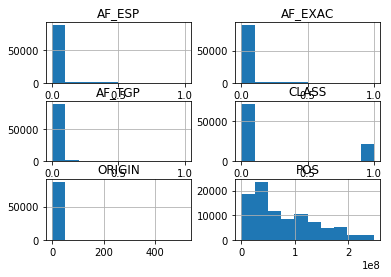

In [70]:
df.hist()

Now we're getting somewhere. This is telling us that most of our data is not normally distributed. For `AF_ESP, AF_EXAC, AF_TGP, ORIGIN`, there is a strong burst of data at the begining of the distribuion, but then it dramatically falls off. I'm thinking we should create binary indicators here for the column being in that first group. The `POS` data is still somewhat skewed, but it's nowhere near as stark. 

In [126]:
def convert_cols_to_binary(df):

    cols_to_convert_to_binary = {'AF_ESP': 4, 'AF_EXAC':5, 'AF_TGP':6}

    # add new columns 
    for c in cols_to_convert_to_binary.keys():
        df['{}_is_zero'.format(c)] =  0
        
    for idx, row in df.iterrows():
    
        for k, v in cols_to_convert_to_binary.items():

            # if that value is zero
            if row[k] in [0, 0.0]:

                # add a binary indicator for that column 
                df.loc[idx, k] = 1
                
    return df 
        

In [ ]:
for idx, row in df.iterrows():
    
    for k, v in cols_to_convert_to_binary.items():

        # if that value is zero
        if row[k] in [0, 0.0]:

            # add a binary indicator for that column 
            df.loc[idx, k] = 1

In [5]:
# dictionaries

In [9]:
# missing values

In [8]:
# one hot encoding

In [13]:
# detecting anomalies

In [12]:
# unit tests in Python

In [14]:
# map reduce for feature engineering 

In [7]:
# correlation & decorrelation

In [ ]:
# package your ETL code as an inference pipeline 

In [10]:
# splitting 